<a href="https://colab.research.google.com/github/RMoulla/PBD_Bruxelles/blob/main/Copie_de_Classification_Churn_Correction_IAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explication et prédiction du churn avec le machine learning

Ce TP vise à explorer et comparer différentes techniques de classification en machine learning pour expliquer et prédire le churn des clients. Le churn, ou l'attrition, est un indicateur clé pour de nombreuses entreprises ; il reflète le pourcentage de clients qui cessent d'utiliser un service sur une période donnée. Comprendre et prédire efficacement le churn peut aider les entreprises à mettre en œuvre des stratégies de rétention ciblées et à améliorer la satisfaction client.

## Le Dataset

Le dataset utilisé dans ce tutoriel contient des données sur les clients d'une entreprise, avec plusieurs caractéristiques qui pourraient influencer leur décision de rester ou de partir.

Ci-dessous un aperçu des variables incluses dans le dataset :

**Names** : Nom du client.

**Age** : Âge du client.

**Total_Purchase** : Montant total des achats effectués par le client.

**Account_Manager** : Indique si un gestionnaire de compte est assigné au client (1) ou non (0).

**Years** : Nombre d'années pendant lesquelles le client est avec l'entreprise.

**Num_Sites** : Nombre de sites utilisés par le client.

Onboard_date: Date à laquelle le client a été acquis.

**Location** : Emplacement du client.

**Company** : Nom de l'entreprise du client.

**Churn** : Indique si le client a churné (1) ou non (0).

## Objectifs Spécifiques du TP

**Exploration de Données** : Comprendre la distribution des données, la corrélation entre les variables et le taux de churn.

**Prétraitement des Données** : Nettoyer et préparer les données pour la modélisation, y compris le traitement des variables catégorielles et la division des données en ensembles d'entraînement et de test.

**Modélisation** : Appliquer plusieurs modèles de classification, tels que la régression logistique, Random Forest et les SVM pour prédire le churn.

**Évaluation des Modèles** : Comparer les performances des modèles en utilisant des métriques telles que la précision, le rappel, l'accuracy, et l'AUC-ROC.

**Optimisation** : Effectuer une optimisation des hyperparamètres sur les modèles sélectionnés pour améliorer leurs performances.

**Interprétation** : Analyser les résultats pour identifier les facteurs clés influençant le churn et discuter des implications pour les stratégies de rétention des clients.

In [ ]:
import pandas as pd

dataset = pd.read_csv('customer_churn.csv')
dataset.head(20)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
5,Jessica Williams,48.0,10356.02,0,5.12,8.0,2009-03-03 23:13:37,"6187 Olson Mountains East Vincentborough, PR 7...",Kelly-Warren,1
6,Eric Butler,44.0,11331.58,1,5.23,11.0,2016-12-05 03:35:43,"4846 Savannah Road West Justin, IA 87713-3460",Reynolds-Sheppard,1
7,Zachary Walsh,32.0,9885.12,1,6.92,9.0,2006-03-09 14:50:20,"25271 Roy Expressway Suite 147 Brownport, FM 5...",Singh-Cole,1
8,Ashlee Carr,43.0,14062.60,1,5.46,11.0,2011-09-29 05:47:23,"3725 Caroline Stravenue South Christineview, M...",Lopez PLC,1
9,Jennifer Lynch,40.0,8066.94,1,7.11,11.0,2006-03-28 15:42:45,"363 Sandra Lodge Suite 144 South Ann, WI 51655...",Reed-Martinez,1


## Analyse exploratoire des données

Nous allons commencer par une analyse exploratoire des données. Cette phase vise à comprendre les données, leur distribution et les relations entre les variables, notamment entre les variables dépendantes (features) et la variable d'intérêt.

In [ ]:
# Quelques statistiques descriptives
print(dataset.describe())

              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


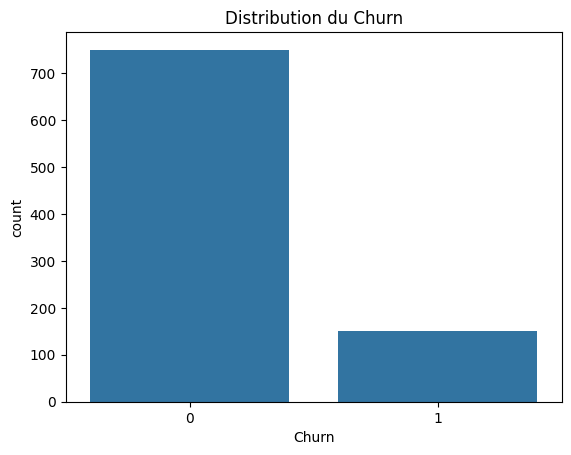

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de la variable Churn
sns.countplot(x='Churn', data=dataset)
plt.title('Distribution du Churn')
plt.show()

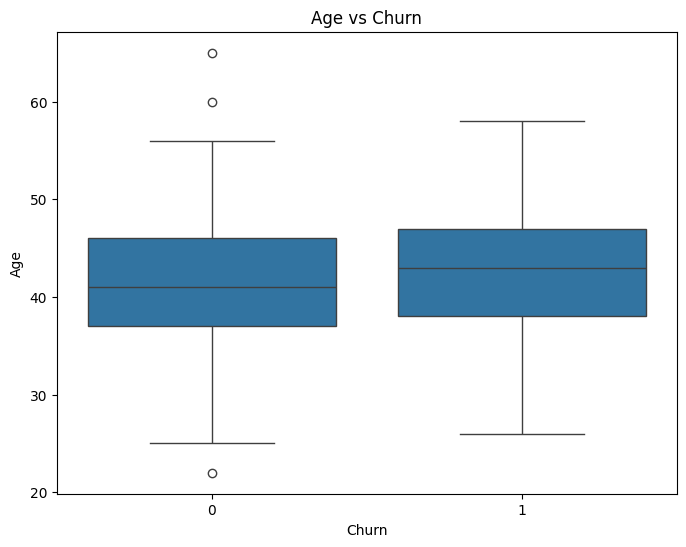

In [ ]:

# Age vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Age', data=dataset)
plt.title('Age vs Churn')
plt.show()

Text(0.5, 0, 'Âge')

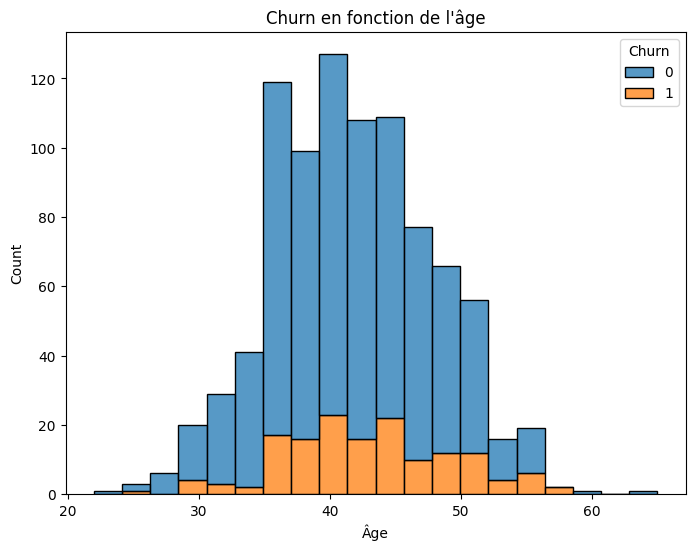

In [ ]:
# Visualiser le churn en fonction de l'âge sous forme de distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Age', hue='Churn', multiple='stack', bins=20)
plt.title('Churn en fonction de l\'âge')
plt.xlabel('Âge')

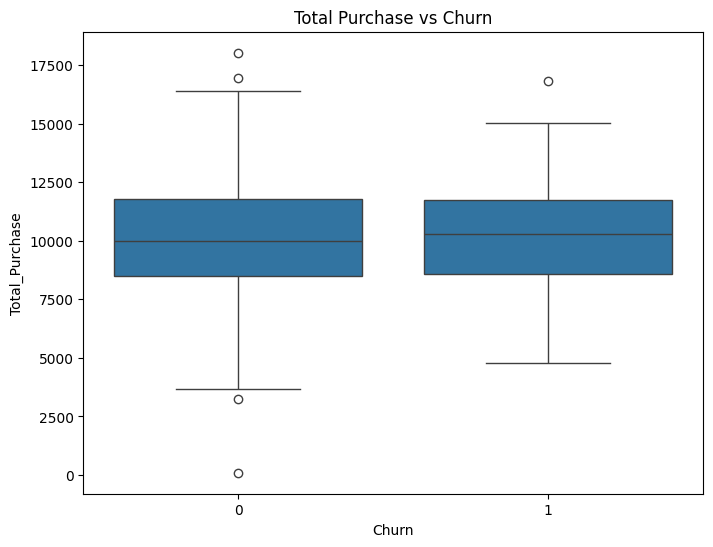

In [ ]:

# Total Purchase vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total_Purchase', data=dataset)
plt.title('Total Purchase vs Churn')
plt.show()

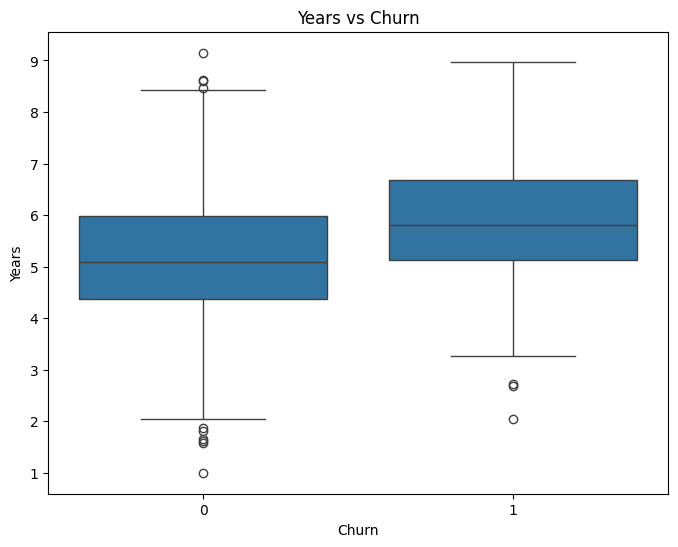

In [ ]:

# Years vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Years', data=dataset)
plt.title('Years vs Churn')
plt.show()

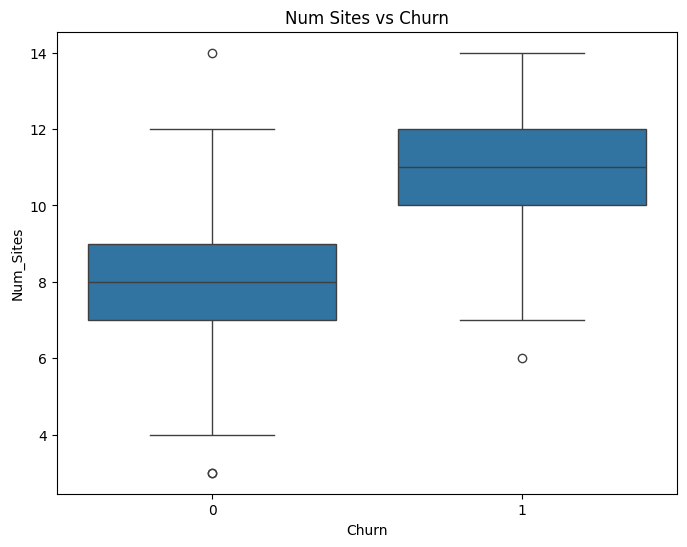

In [ ]:
plt.show()

# Num Sites vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Num_Sites', data=dataset)
plt.title('Num Sites vs Churn')
plt.show()

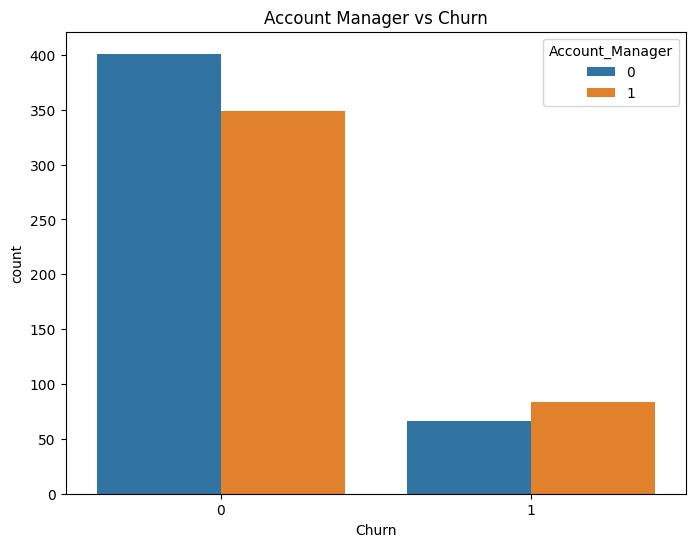

In [ ]:
# Account Manager vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='Account_Manager', data=dataset)
plt.title('Account Manager vs Churn')
plt.show()

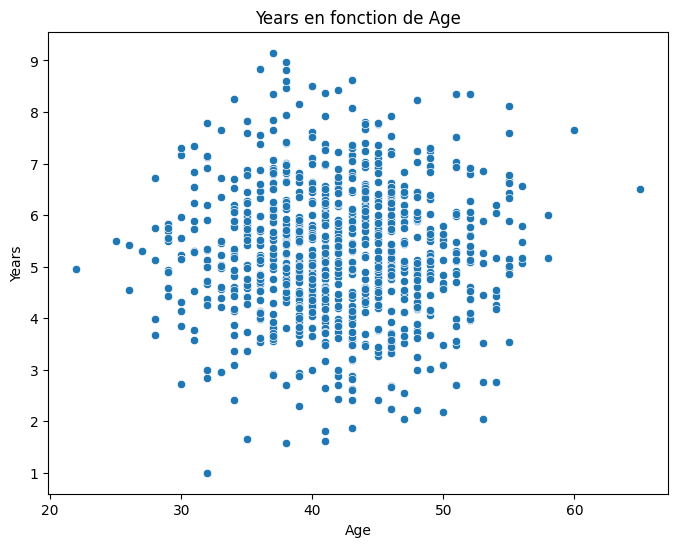

In [ ]:
# Visualiser Years en fonction de Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Years', data=dataset)
plt.title('Years en fonction de Age')
plt.show()

## Modélisation

Dans cette phase, nous allons entraîner plusieurs modèles de classification, dont la régression logistique, Random Forest et, potentiellement, les SVM. Notre objectif est à la fois la compréhension des déterminants de churn et la prédiction de celui-ci.

Nous allons d'abord commencer par partionner notre dataset en jeu de données d'entraînement et jeu de données de test.

In [ ]:
from sklearn.model_selection import train_test_split
# Partitionner le dataset en train et test

features = ['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']
X = dataset[features]
y = dataset['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
10,30.0,11575.37,1,5.22,8.0
334,40.0,6773.23,1,4.29,11.0
244,37.0,15070.32,0,6.91,6.0
678,43.0,5907.07,0,5.89,8.0
306,46.0,11538.57,1,7.93,10.0
...,...,...,...,...,...
106,43.0,6715.23,0,4.16,8.0
270,44.0,9613.84,1,4.38,8.0
860,39.0,13731.45,1,8.15,10.0
435,36.0,12879.70,0,4.70,9.0


### Régression logistique

In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train_const)
result_sm = logit_model.fit()

print(result_sm.summary())

Optimization terminated successfully.
         Current function value: 0.257054
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  720
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Nov 2025   Pseudo R-squ.:                  0.4237
Time:                        09:16:43   Log-Likelihood:                -185.08
converged:                       True   LL-Null:                       -321.17
Covariance Type:            nonrobust   LLR p-value:                 9.559e-57
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.1136      1.931     -9.896      0.000     -22.899     -15.328
Age           

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_test_pred_prob = result_sm.predict(X_test_const)

# imprimer les prédictions
print(y_test_pred_prob, '\n')

y_test_pred_sm = (y_test_pred_prob >= 0.25).astype(int)

# Calculate performance metrics using statsmodels predictions
accuracy = accuracy_score(y_test, y_test_pred_sm)
precision = precision_score(y_test, y_test_pred_sm)
recall = recall_score(y_test, y_test_pred_sm)
f1 = f1_score(y_test, y_test_pred_sm)

performance_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

performance_metrics

70     0.397622
827    0.179830
231    0.019421
588    0.129233
39     0.671608
         ...   
897    0.000186
578    0.901334
779    0.014015
25     0.457460
84     0.081024
Length: 180, dtype: float64 



{'Accuracy': 0.9,
 'Precision': 0.7058823529411765,
 'Recall': 0.75,
 'F1 Score': 0.7272727272727273}

## SVM

In [ ]:
from sklearn.svm import SVC
# entrainer un modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

performances_metrics_svm = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm
}

performances_metrics_svm

{'Accuracy': 0.8888888888888888,
 'Precision': 0.8,
 'Recall': 0.5,
 'F1 Score': 0.6153846153846154}

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entraîner un modèle random forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

performances_metrics_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

performances_metrics_rf

{'Accuracy': 0.8722222222222222,
 'Precision': 0.7368421052631579,
 'Recall': 0.4375,
 'F1 Score': 0.5490196078431373}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30]
}

# Créer le modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculer et afficher les métriques de performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

performances_metrics_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

print("\nMétriques de performance du modèle RandomForest optimisé:")
performances_metrics_rf

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparamètres: {'max_depth': 5, 'n_estimators': 50}

Métriques de performance du modèle RandomForest optimisé:


{'Accuracy': 0.8722222222222222,
 'Precision': 0.7368421052631579,
 'Recall': 0.4375,
 'F1 Score': 0.5490196078431373}

# statsmodels
# scikit-learn